<a href="https://colab.research.google.com/github/lizzyzacharias/Gold-Standard-Pipeline-Guide/blob/main/Week4_Large_Bcell_Lymphoma_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold standard Example 1
To solve the question: "What's the relationship between the BRCA gene and Breast Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
# This cell is only for use on Google Colab

import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA/TCGA_Large_Bcell_Lymphoma_(DLBC)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.DLBC.sampleMap_DLBC_clinicalMatrix  TCGA.DLBC.sampleMap_HiSeqV2_PANCAN.gz


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.DLBC.sampleMap_DLBC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.DLBC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,b_lymphocyte_genotyping_method,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,...,_GENOMIC_ID_TCGA_DLBC_hMethyl450,_GENOMIC_ID_TCGA_DLBC_miRNA_HiSeq,_GENOMIC_ID_TCGA_DLBC_gistic2thd,_GENOMIC_ID_TCGA_DLBC_PDMRNAseqCNV,_GENOMIC_ID_data/public/TCGA/DLBC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_DLBC_gistic2,_GENOMIC_ID_TCGA_DLBC_mutation_bcm_gene,_GENOMIC_ID_TCGA_DLBC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_DLBC_RPPA,_GENOMIC_ID_TCGA_DLBC_exp_HiSeqV2_PANCAN
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-FA-8693-01,TCGA-FA-8693-01,TCGA-FA-8693,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,75,NaN,TCGA-FA-8693-F42020,TCGA-FA-8693,TCGA-FA-8693-01A,...,TCGA-FA-8693-01A-11D-2399-05,TCGA-FA-8693-01,TCGA-FA-8693-01A-11D-2389-01,TCGA-FA-8693-01,TCGA-FA-8693-01,TCGA-FA-8693-01A-11D-2389-01,TCGA-FA-8693-01A-11D-2397-10,74108a37-6306-4389-93c2-b2d306ad6709,E80F1E78-0477-4A56-8F2C-CB88B6BB8938,74108a37-6306-4389-93c2-b2d306ad6709
TCGA-FA-A4BB-01,TCGA-FA-A4BB-01,TCGA-FA-A4BB,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,67,NaN,TCGA-FA-A4BB-F49912,TCGA-FA-A4BB,TCGA-FA-A4BB-01A,...,TCGA-FA-A4BB-01A-11D-A31Y-05,TCGA-FA-A4BB-01,TCGA-FA-A4BB-01A-11D-A31W-01,TCGA-FA-A4BB-01,TCGA-FA-A4BB-01,TCGA-FA-A4BB-01A-11D-A31W-01,TCGA-FA-A4BB-01A-11D-A31X-10,d4923060-b733-42cb-ab55-b43a2c9a9151,8071470F-41FB-441A-A3EA-43E08333109C,d4923060-b733-42cb-ab55-b43a2c9a9151
TCGA-FA-A4XK-01,TCGA-FA-A4XK-01,TCGA-FA-A4XK,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,40,NaN,TCGA-FA-A4XK-F68091,TCGA-FA-A4XK,TCGA-FA-A4XK-01A,...,TCGA-FA-A4XK-01A-11D-A31Y-05,TCGA-FA-A4XK-01,TCGA-FA-A4XK-01A-11D-A31W-01,TCGA-FA-A4XK-01,TCGA-FA-A4XK-01,TCGA-FA-A4XK-01A-11D-A31W-01,TCGA-FA-A4XK-01A-11D-A31X-10,95db81b0-d9e6-4cbf-b13f-7c1b92c26484,923E2FAF-6F97-4D7E-983E-6D982490825B,95db81b0-d9e6-4cbf-b13f-7c1b92c26484
TCGA-FA-A6HN-01,TCGA-FA-A6HN-01,TCGA-FA-A6HN,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,73,NaN,TCGA-FA-A6HN-F63567,TCGA-FA-A6HN,TCGA-FA-A6HN-01A,...,TCGA-FA-A6HN-01A-11D-A31Y-05,TCGA-FA-A6HN-01,TCGA-FA-A6HN-01A-11D-A31W-01,TCGA-FA-A6HN-01,TCGA-FA-A6HN-01,TCGA-FA-A6HN-01A-11D-A31W-01,TCGA-FA-A6HN-01A-11D-A31X-10,f6788ba9-322e-49b0-93e4-f1b451f2a985,567EC21A-D4DD-493B-BE78-57D4ECBA5A11,f6788ba9-322e-49b0-93e4-f1b451f2a985
TCGA-FA-A6HO-01,TCGA-FA-A6HO-01,TCGA-FA-A6HO,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,58,NaN,TCGA-FA-A6HO-F71473,TCGA-FA-A6HO,TCGA-FA-A6HO-01A,...,TCGA-FA-A6HO-01A-11D-A31Y-05,TCGA-FA-A6HO-01,TCGA-FA-A6HO-01A-11D-A31W-01,TCGA-FA-A6HO-01,TCGA-FA-A6HO-01,TCGA-FA-A6HO-01A-11D-A31W-01,TCGA-FA-A6HO-01A-11D-A31X-10,52ece957-8f21-4f13-a61d-7b2e1c850ef5,731E0A85-D8EA-4F5D-9EC4-35131FD15957,52ece957-8f21-4f13-a61d-7b2e1c850ef5


In [5]:
# Display gene dataset
gene_data.head()

,TCGA-FF-8043-01,TCGA-GR-A4D4-01,TCGA-G8-6909-01,TCGA-FF-A7CR-01,TCGA-FF-8062-01,TCGA-GR-7351-01,TCGA-GS-A9TW-01,TCGA-GR-A4D5-01,TCGA-G8-6907-01,TCGA-RQ-AAAT-01,...,TCGA-GS-A9TX-01,TCGA-FF-A7CQ-01,TCGA-FA-A4BB-01,TCGA-G8-6325-01,TCGA-FF-8042-01,TCGA-G8-6324-01,TCGA-GS-A9TU-01,TCGA-GS-A9U4-01,TCGA-GR-7353-01,TCGA-FA-A6HN-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-1.460892,-0.794092,-0.826092,-0.141792,-0.835492,-0.272692,0.083508,0.147408,-3.815392,-2.534292,...,-2.584492,-1.981392,-0.649392,0.426108,-0.346092,-2.536892,-0.267992,-0.312292,-3.177492,-0.836392
HIF3A,-2.748326,-4.532626,-1.948226,-3.064026,-2.947526,-2.215326,-1.299226,-1.784926,-4.440926,-3.874326,...,-3.426426,-2.732726,-0.784126,-0.971426,-3.419926,-0.133726,-2.024126,-2.928926,-2.292326,0.240874
RNF17,-0.531035,-0.531035,-0.531035,1.354665,0.561065,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,0.592065,-0.531035,-0.531035,-0.531035,0.024965,-0.531035,0.045665
RNF10,-0.106172,-0.339572,-0.607572,0.245328,-0.100372,0.189828,-0.328172,0.274428,-0.324172,-0.352572,...,0.140228,-0.216072,-0.116472,-0.267172,-0.588272,-0.069172,-0.140272,-0.363572,0.085728,-0.090072
RNF11,-2.972378,-2.001178,-3.314078,-1.282978,-2.204678,-2.637378,-1.691578,-1.485378,-2.145478,-2.816378,...,-1.493378,-1.769578,-1.052078,-2.326978,-2.672378,-1.117678,-1.091978,-1.093578,-3.333478,-1.722578


In [6]:
# Set Basic info

gene_fullname = 'BCL2 gene'
gene = 'bcl2'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Large B-cell Lymphoma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 105 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,b_lymphocyte_genotyping_method,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-FA-8693-01,TCGA-FA-8693-01,TCGA-FA-8693,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,75,NaN,TCGA-FA-8693-F42020,TCGA-FA-8693,TCGA-FA-8693-01A,...,-0.748878,-1.587117,4.630667,-1.28139,-2.739077,-1.086486,-0.758427,1.338005,2.226867,1.117488
TCGA-FA-A4BB-01,TCGA-FA-A4BB-01,TCGA-FA-A4BB,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,67,NaN,TCGA-FA-A4BB-F49912,TCGA-FA-A4BB,TCGA-FA-A4BB-01A,...,0.042322,1.466783,3.208567,-1.28139,-1.449877,-1.670586,-0.970927,0.541605,2.017767,0.452588
TCGA-FA-A4XK-01,TCGA-FA-A4XK-01,TCGA-FA-A4XK,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,40,NaN,TCGA-FA-A4XK-F68091,TCGA-FA-A4XK,TCGA-FA-A4XK-01A,...,-0.316278,-1.154517,2.361867,-1.28139,-1.479277,0.187814,0.767273,0.701205,-1.022333,-0.014912
TCGA-FA-A6HN-01,TCGA-FA-A6HN-01,TCGA-FA-A6HN,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,73,NaN,TCGA-FA-A6HN-F63567,TCGA-FA-A6HN,TCGA-FA-A6HN-01A,...,-0.748878,-0.018817,2.804267,1.02051,-1.772477,-1.993086,-0.042427,0.800105,2.998367,-0.505212
TCGA-FA-A6HO-01,TCGA-FA-A6HO-01,TCGA-FA-A6HO,TCGA Large B-cell Lymphoma (DLBC),diffuse large B-cell lymphoma,Lymphatic tissue,58,NaN,TCGA-FA-A6HO-F71473,TCGA-FA-A6HO,TCGA-FA-A6HO-01A,...,-0.266778,0.725683,3.218567,-1.28139,-1.658377,-0.773386,-1.318127,1.176405,1.092467,-0.168112


In [8]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-FA-8693-01,-27468,-0.016192,-4.254026,-0.531035,-0.309572,-1.605778,0.31609,-1.112794,2.502954,0.149801,...,-0.748878,-1.587117,4.630667,-1.28139,-2.739077,-1.086486,-0.758427,1.338005,2.226867,1.117488
TCGA-FA-A4BB-01,-24590,-0.649392,-0.784126,-0.531035,-0.116472,-1.052078,-0.07741,-0.430994,1.947654,-0.423399,...,0.042322,1.466783,3.208567,-1.28139,-1.449877,-1.670586,-0.970927,0.541605,2.017767,0.452588
TCGA-FA-A4XK-01,-14723,-1.168292,-2.833526,-0.531035,0.521528,-1.519678,-0.94711,-0.935594,1.185554,-0.423399,...,-0.316278,-1.154517,2.361867,-1.28139,-1.479277,0.187814,0.767273,0.701205,-1.022333,-0.014912
TCGA-FA-A6HN-01,-27025,-0.836392,0.240874,0.045665,-0.090072,-1.722578,-0.85351,-0.945494,0.960954,-0.423399,...,-0.748878,-0.018817,2.804267,1.02051,-1.772477,-1.993086,-0.042427,0.800105,2.998367,-0.505212
TCGA-FA-A6HO-01,-21330,-0.596092,-0.265826,-0.531035,-0.082972,-1.472778,0.23509,0.129906,2.763754,0.058701,...,-0.266778,0.725683,3.218567,-1.28139,-1.658377,-0.773386,-1.318127,1.176405,1.092467,-0.168112


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Large B-cell Lymphoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-FA-8693-01,-27468,-0.016192,-4.254026,-0.531035,-0.309572,-1.605778,0.31609,-1.112794,2.502954,0.149801,...,-1.587117,4.630667,-1.28139,-2.739077,-1.086486,-0.758427,1.338005,2.226867,1.117488,1
TCGA-FA-A4BB-01,-24590,-0.649392,-0.784126,-0.531035,-0.116472,-1.052078,-0.07741,-0.430994,1.947654,-0.423399,...,1.466783,3.208567,-1.28139,-1.449877,-1.670586,-0.970927,0.541605,2.017767,0.452588,1
TCGA-FA-A4XK-01,-14723,-1.168292,-2.833526,-0.531035,0.521528,-1.519678,-0.94711,-0.935594,1.185554,-0.423399,...,-1.154517,2.361867,-1.28139,-1.479277,0.187814,0.767273,0.701205,-1.022333,-0.014912,1
TCGA-FA-A6HN-01,-27025,-0.836392,0.240874,0.045665,-0.090072,-1.722578,-0.85351,-0.945494,0.960954,-0.423399,...,-0.018817,2.804267,1.02051,-1.772477,-1.993086,-0.042427,0.800105,2.998367,-0.505212,1
TCGA-FA-A6HO-01,-21330,-0.596092,-0.265826,-0.531035,-0.082972,-1.472778,0.23509,0.129906,2.763754,0.058701,...,0.725683,3.218567,-1.28139,-1.658377,-0.773386,-1.318127,1.176405,1.092467,-0.168112,1


In [10]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

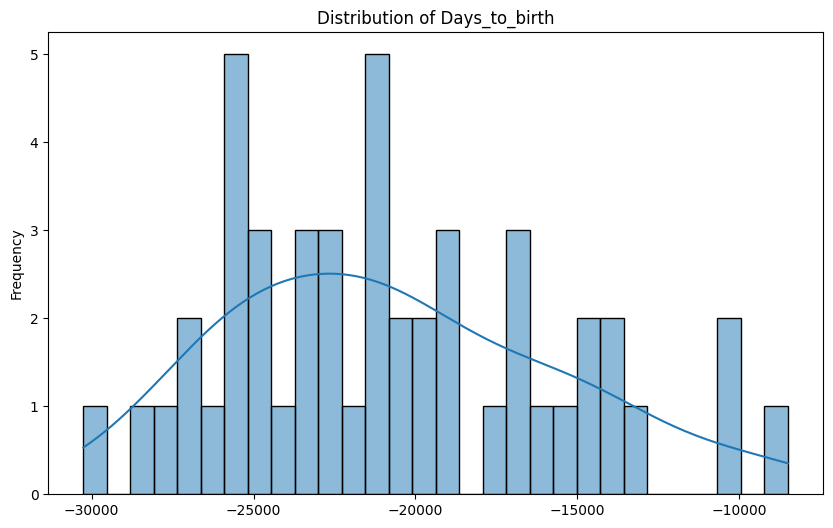

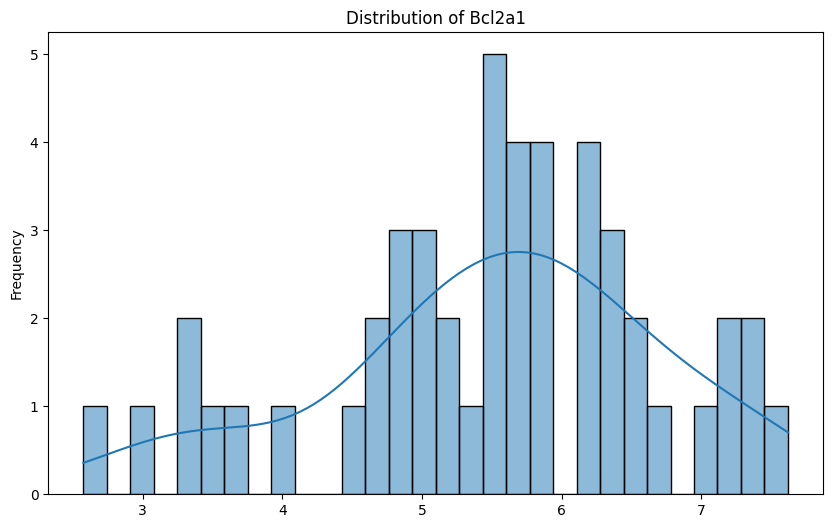

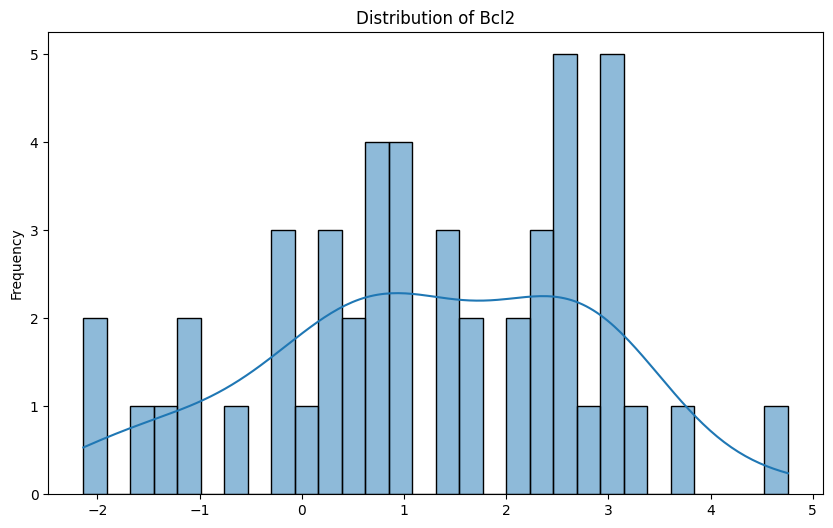

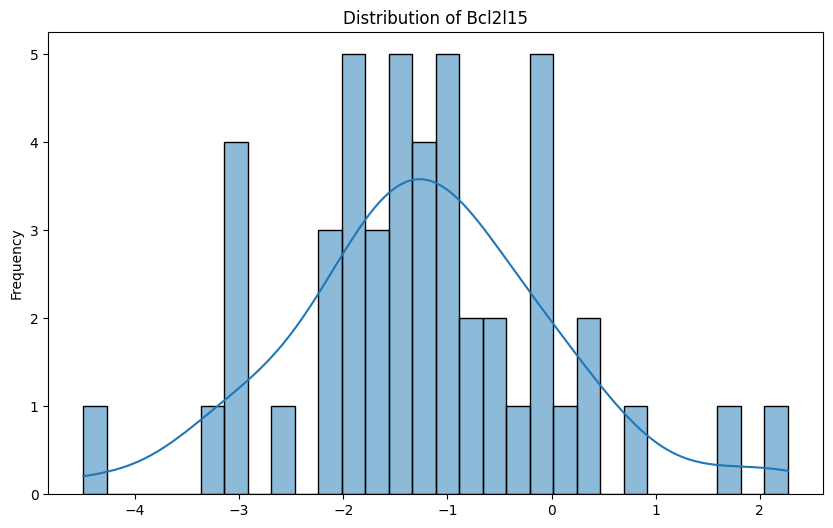

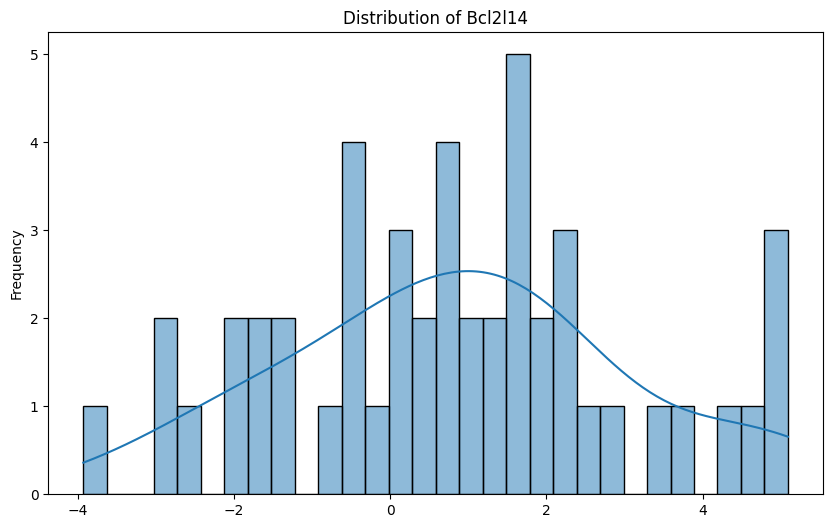

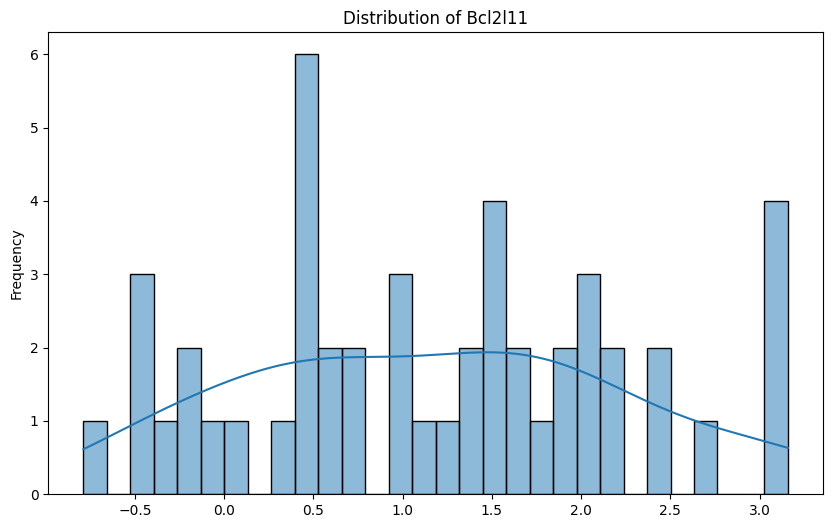

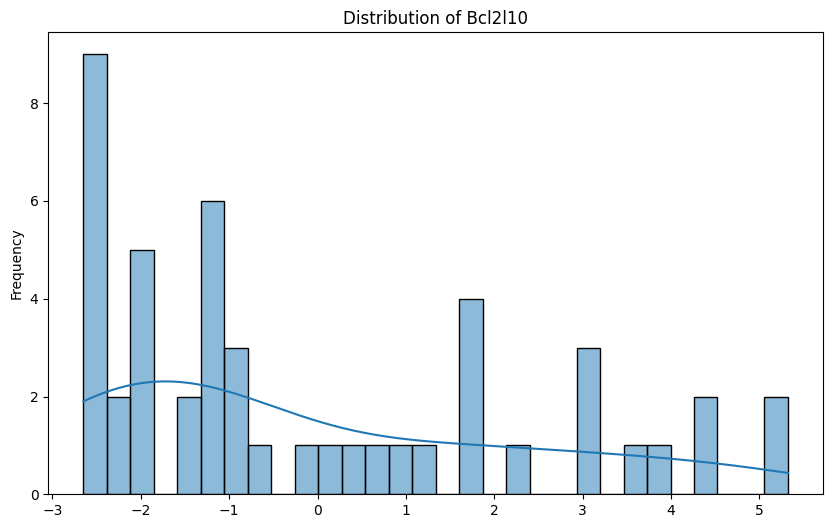

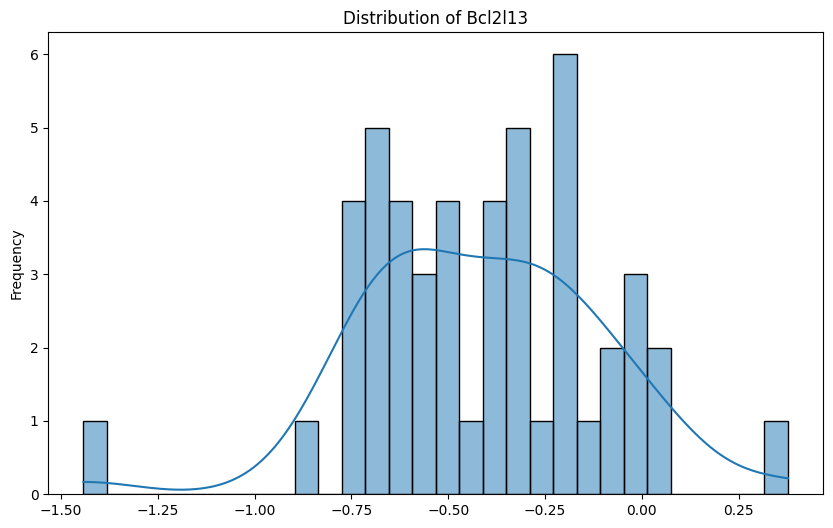

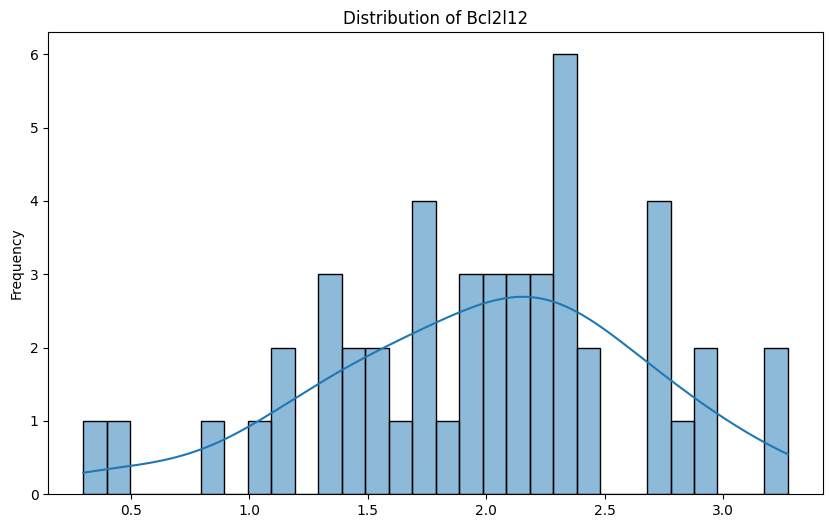

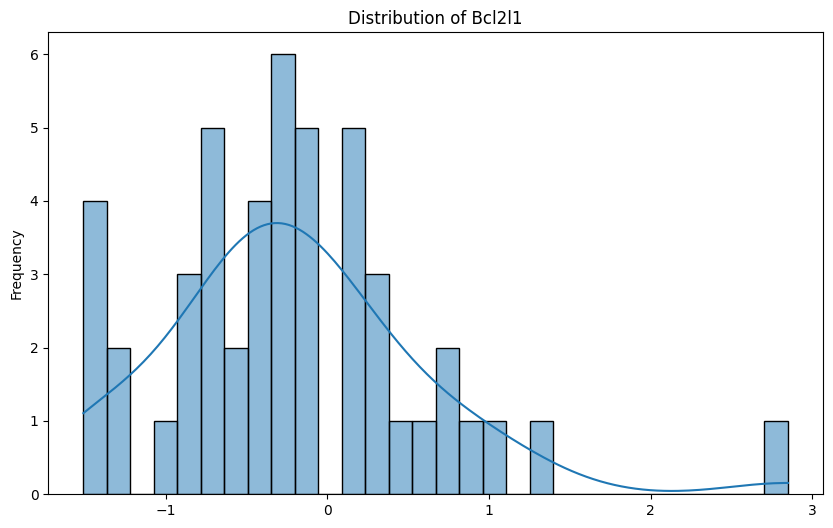

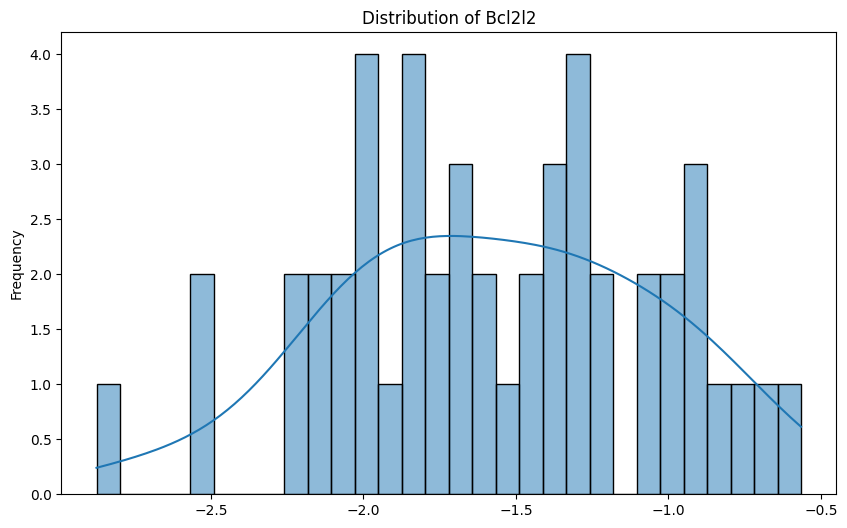

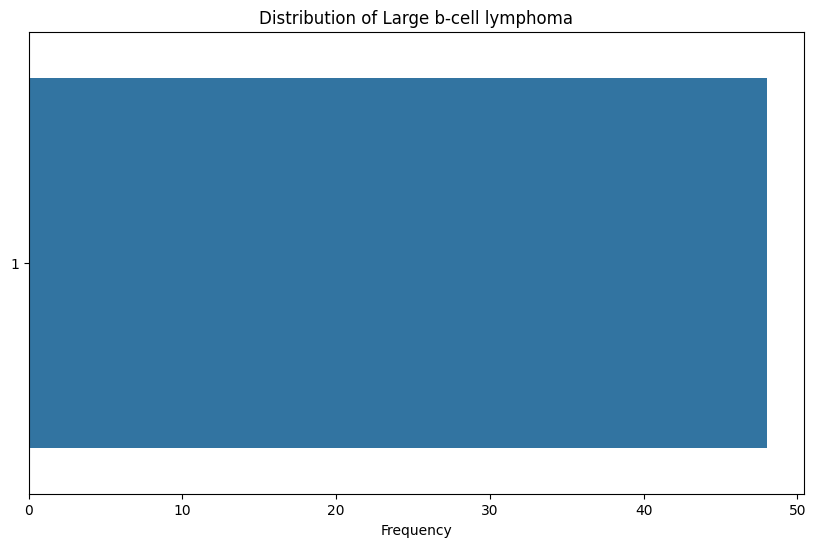

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

Then, draw scatter plots to visualize the relationship between pairs of variables (Optional)

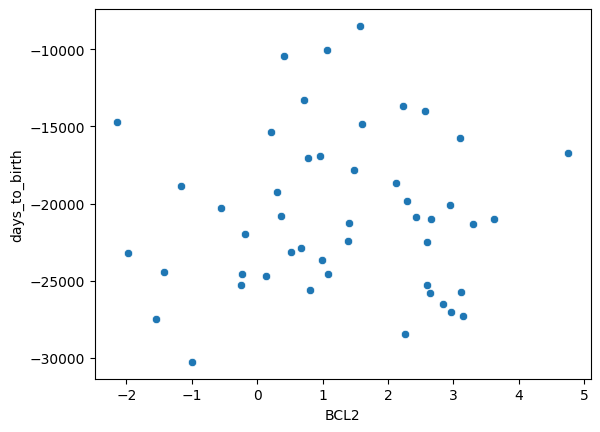

In [12]:
sns.scatterplot(data=merged_data, x='BCL2', y=condition_col)
plt.show()



In [13]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Large B-cell Lymphoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-FA-8693-01,75,-0.016192,-4.254026,-0.531035,-0.309572,-1.605778,0.31609,-1.112794,2.502954,0.149801,...,-1.587117,4.630667,-1.28139,-2.739077,-1.086486,-0.758427,1.338005,2.226867,1.117488,1
TCGA-FA-A4BB-01,67,-0.649392,-0.784126,-0.531035,-0.116472,-1.052078,-0.07741,-0.430994,1.947654,-0.423399,...,1.466783,3.208567,-1.28139,-1.449877,-1.670586,-0.970927,0.541605,2.017767,0.452588,1
TCGA-FA-A4XK-01,40,-1.168292,-2.833526,-0.531035,0.521528,-1.519678,-0.94711,-0.935594,1.185554,-0.423399,...,-1.154517,2.361867,-1.28139,-1.479277,0.187814,0.767273,0.701205,-1.022333,-0.014912,1
TCGA-FA-A6HN-01,73,-0.836392,0.240874,0.045665,-0.090072,-1.722578,-0.85351,-0.945494,0.960954,-0.423399,...,-0.018817,2.804267,1.02051,-1.772477,-1.993086,-0.042427,0.800105,2.998367,-0.505212,1
TCGA-FA-A6HO-01,58,-0.596092,-0.265826,-0.531035,-0.082972,-1.472778,0.23509,0.129906,2.763754,0.058701,...,0.725683,3.218567,-1.28139,-1.658377,-0.773386,-1.318127,1.176405,1.092467,-0.168112,1


### 3. Do regression & Cross Validation

In [14]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

<ipython-input-14-168e47ada711>:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.9555555555555555


In [15]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [16]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For bcl2:
BCL2A1: Coefficient = -1.2490197335320155e-30, p-value = 0.9999999999999873
BCL2: Coefficient = 1.0202864320942252e-30, p-value = 0.9999999999999906
BCL2L15: Coefficient = -3.046021195358683e-31, p-value = 0.9999999999999969
BCL2L14: Coefficient = -2.8830985754159547e-31, p-value = 0.9999999999999976
BCL2L11: Coefficient = 1.6123467056101674e-30, p-value = 0.9999999999999818
BCL2L10: Coefficient = -1.2045941380254189e-32, p-value = 0.9999999999999999
BCL2L13: Coefficient = 7.083154308026909e-31, p-value = 0.999999999999992
BCL2L12: Coefficient = -1.5035886593675679e-30, p-value = 0.9999999999999881
BCL2L1: Coefficient = -3.1251347239184835e-31, p-value = 0.9999999999999969
BCL2L2: Coefficient = -3.448540999161017e-31, p-value = 0.9999999999999973

For age:
age: Coefficient = -1.4403209734624048e-31, p-value = 0.9999999999999982



### 4. Discussion

In [17]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BCL2 gene and Large B-cell Lymphoma when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BCL2 gene and Large B-cell Lymphoma when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BCL2 gene and Large B-cell Lymphoma when considering the influence of age.




In [18]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BCL2A1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L15
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L14
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L11
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L10
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L13
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L12
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: BCL2L2
Coefficient is ne

In [19]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: BCL2A1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BCL2A1 gene and Large B-cell Lymphoma when considering the influence of age.

Variable: BCL2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BCL2 gene and Large B-cell Lymphoma when considering the influence of age.

Variable: BCL2L15
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BCL2L15 gene and Large B-cell Lymphoma when considering the influence of age.

Variable: BCL2L14
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BCL2L14 gene and Large B-cell Lymphoma when considering the influence of age.

Variable: BCL2L11
Conclusion: H0 is not rejected: There